## Fetching Dataset    

In [20]:
from sklearn.datasets import  fetch_openml

In [21]:
mnist = fetch_openml ('mnist_784', parser='auto')

In [25]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [22]:
x , y = mnist['data'] , mnist['target']

In [23]:
x. shape

(70000, 784)

In [24]:
y.shape

(70000,)

In [17]:
%matplotlib inline

In [18]:
import matplotlib
import matplotlib.pyplot as plt

In [19]:
print(x.shape)
print(x.index)


(70000, 784)
RangeIndex(start=0, stop=70000, step=1)


In [31]:
some_digit = x.iloc[36009]
some_digit_array = np.array(some_digit)
some_digit_image = some_digit_array.reshape(28, 28)


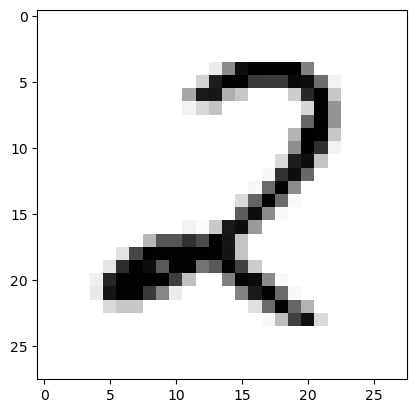

In [26]:
plt.imshow(some_digit_image, cmap="binary", interpolation="nearest")
plt.show()


In [27]:
y.iloc[36009]

'2'

In [32]:
x_train, x_test = x[:60000], x[60000:]

In [33]:
y_train, y_test = y[:60000], y[60000:]

In [34]:
shuffled_indices = np.random.permutation(len(x_train))

x_train_shuffled = x_train.iloc[shuffled_indices].reset_index(drop=True)
y_train_shuffled = y_train.iloc[shuffled_indices].reset_index(drop=True)


## Creating a 2 detector


In [35]:
y_train = y_train.astype(np.int8)
y_train_2 = (y_train==2)

In [36]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int8

In [58]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

scaler.mean_

scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [59]:
X_scaled.mean(axis=0)

X_scaled.std(axis=0)

array([1., 1., 1.])

In [62]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 

pipe.score(X_test, y_test) 

0.96

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')


print("Cross-validated Accuracy:", scores)


C:\Users\Shivani Parihar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shivani Parihar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Cross-validated Accuracy: [0.9769  0.97725 0.98015]
